In [30]:
#CompetingStationsPrice_AnalyzeFactors
### 查看竞争站点的价格会影响哪个要素 ###

### STEP1：读取数据 ###
import pandas as pd


# 数据列：从高德处获取
COLS_ORDER_CNT_GAODE_QIYOU = '进站加油车量（汽油）'     #高德统计的进站加油车量，应该与实际值存在一个比例关系，即高德的市场占有率
COLS_ORDER_CNT_GAODE_CHAIYOU = '进站加油车量（柴油）'   #同上
COLS_RATE_QIYOU = '进站率（汽油）'
COLS_RATE_CHAIYOU = '进站率（柴油）'
COLS_GAODE_QIYOU = '站前车流量（汽油）'
COLS_GAODE_CHAIYOU = '站前车流量（柴油）'


# 汽油
COLS_PRICE_304 = '60000304_price'                   #92号国六A
COLS_PRICE_304_OTHER = '60000304_price_other'
COLS_AMOUNT_304 = '60000304_amount'  
COLS_PRICE_305 = '60000305_price'                   #92号国六B
COLS_PRICE_305_OTHER = '60000305_price_other'
COLS_AMOUNT_305 = '60000305_amount'  
COLS_PRICE_312 = '60000312_price'                   #95号国六A
COLS_PRICE_312_OTHER = '60000312_price_other'
COLS_AMOUNT_312 = '60000312_amount'  
COLS_PRICE_313 = '60000313_price'                   #95号国六B
COLS_PRICE_313_OTHER = '60000313_price_other'
COLS_AMOUNT_313 = '60000313_amount'  
COLS_PRICE_317 = '60000317_price'                   #98号
COLS_PRICE_317_OTHER = '60000317_price_other'
COLS_AMOUNT_317 = '60000317_amount'  
#COLS_DROP = ['date', 'amount', COLS_PREDICT, COLS_PRICE_OTHER]
COLS_QIYOU = ['date', 'amount', 
            COLS_ORDER_CNT_GAODE_QIYOU, COLS_ORDER_CNT_GAODE_CHAIYOU, 
            COLS_RATE_QIYOU, COLS_RATE_CHAIYOU,
            COLS_GAODE_QIYOU, COLS_GAODE_CHAIYOU,
            COLS_PRICE_304, COLS_PRICE_304_OTHER, COLS_AMOUNT_304,
            COLS_PRICE_305, COLS_PRICE_305_OTHER, COLS_AMOUNT_305,
            COLS_PRICE_312, COLS_PRICE_312_OTHER, COLS_AMOUNT_312,
            COLS_PRICE_313, COLS_PRICE_313_OTHER, COLS_AMOUNT_313,
            COLS_PRICE_317, COLS_PRICE_317_OTHER, COLS_AMOUNT_317
            ]

#柴油
COLS_PRICE_359 = '60000359_price'                   #0号柴油
COLS_PRICE_359_OTHER = '60000359_price_other'
COLS_CNT_359 = '60000359_order_cnt'
COLS_AMOUNT_359 = '60000359_amount'
COLS_CAR_FLOW_CHAIYOU= '进站加油车量（柴油）'
COLS_CHAIYOU = ['date', 'amount', COLS_CAR_FLOW_CHAIYOU,
            COLS_ORDER_CNT_GAODE_QIYOU, COLS_ORDER_CNT_GAODE_CHAIYOU, 
            COLS_RATE_QIYOU, COLS_RATE_CHAIYOU,
            COLS_GAODE_QIYOU, COLS_GAODE_CHAIYOU,
            COLS_PRICE_359, COLS_PRICE_359_OTHER, COLS_CNT_359, COLS_AMOUNT_359
            ]

# 读取excel文件并获取指定列
df = pd.read_csv('../Data/竞争站分析-竞争站-单站-32801309.csv', usecols=COLS_CHAIYOU, encoding='GBK')
print(df.head())

       date     amount  进站加油车量（汽油）  进站加油车量（柴油）  进站率（汽油）  进站率（柴油）  站前车流量（汽油）  \
0  2023/1/1  105172.09         161          18     4.50     2.70       3576   
1  2023/1/2  212527.77         212          37     5.73     4.51       3704   
2  2023/1/3  166642.07         196          53     4.78     5.10       4099   
3  2023/1/4  110388.43         160          46     4.02     4.23       3980   
4  2023/1/5  307893.96         183          38     4.31     3.44       4246   

   站前车流量（柴油）  60000359_price      60000359_price_other  60000359_order_cnt  \
0        668            7.20        [5.07, 6.69, 7.20]                  41   
1        820            7.20        [5.07, 6.69, 7.20]                  57   
2       1038            7.20        [5.07, 6.69, 7.20]                  60   
3       1087            7.41  [5.07, 6.59, 6.60, 7.41]                  53   
4       1106            7.41  [5.07, 6.59, 6.60, 7.41]                  76   

   60000359_amount  
0         44743.26  
1         9876

In [31]:
import CompetingStationPrice_Utils as PriceUtils

def get_avrange_price():
    pass

# 测试价差
# df['diff305'] = df.apply(lambda row: PriceUtils.get_diff_price(row[COLS_PRICE_305], row[COLS_PRICE_305_OTHER]), axis=1)
# df['diff313'] = df.apply(lambda row: PriceUtils.get_diff_price(row[COLS_PRICE_313], row[COLS_PRICE_313_OTHER]), axis=1)
# df_corr = df[['diff305', 'diff313',
#                COLS_RATE_QIYOU, COLS_GAODE_QIYOU, COLS_ORDER_CNT_GAODE_QIYOU]]
df['diff359'] = df.apply(lambda row: PriceUtils.get_diff_price(row[COLS_PRICE_359], row[COLS_PRICE_359_OTHER]), axis=1)



In [32]:
### 对传入的数据 data 进行正态性检验 ###
from scipy import stats
import numpy as np

data = df[COLS_RATE_CHAIYOU]

def rin_transform(data):
    # 对数据进行排序并获取秩次
    ranks = np.argsort(np.argsort(data))
    # 将秩次转换为正态分布的值
    norm_ranks = stats.norm.ppf((ranks - 0.5) / len(data))  # 使用 -0.5 来使得转换后的均值为0
    return norm_ranks
# df['new_rate_qiyou'] = rin_transform(df[COLS_RATE_QIYOU])
# df['new_diff305'] = rin_transform(df['diff305'] )


def normal_test(data):    
    u = data.mean()    
    std = data.std()    
    result = stats.kstest(data, 'norm', (u, std))    
    print(result)
# normal_test(df['diff305'])

# 计算Pearson相关系数
# df_new = df.drop(columns=['date',COLS_PRICE_305_OTHER], axis=1)
# correlation_matrix = df_new.corr()
# # 绘制热图
# import seaborn as sns
# import matplotlib.pyplot as plt
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
# plt.show()

In [33]:
from scipy.stats import pearsonr, spearmanr, kendalltau

# 首先，指定两列数据
COLS_A = COLS_AMOUNT_359
COLS_B = COLS_CAR_FLOW_CHAIYOU

# 确保这两列没有缺失值
df_clean = df[[COLS_A, COLS_B]].dropna()

# 使用Pearson相关系数计算相关性及p值
pearson_corr, pearson_pvalue = pearsonr(df_clean[COLS_A], df_clean[COLS_B])

# 使用Spearman等级相关系数计算相关性及p值
spearman_corr, spearman_pvalue = spearmanr(df_clean[COLS_A], df_clean[COLS_B])

# 使用Kendall等级相关系数计算相关性及p值
kendall_corr, kendall_pvalue = kendalltau(df_clean[COLS_A], df_clean[COLS_B])

# 打印结果
print(f"Pearson相关系数: {pearson_corr}, p值: {pearson_pvalue}")
print(f"Spearman相关系数: {spearman_corr}, p值: {spearman_pvalue}")
print(f"Kendall相关系数: {kendall_corr}, p值: {kendall_pvalue}")

Pearson相关系数: 0.31013925533610637, p值: 1.4057494024715812e-09
Spearman相关系数: 0.3447646282644101, p值: 1.2623104399184503e-11
Kendall相关系数: 0.23858779309720266, p值: 1.9602219746286087e-11


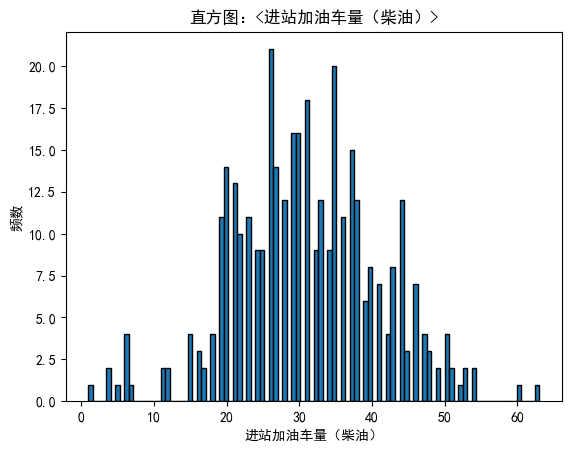

In [34]:
import matplotlib.pyplot as plt

# 选择要绘制直方图的列
column_name = COLS_CAR_FLOW_CHAIYOU

# 绘制直方图
plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置中文字体
plt.hist(df[column_name], bins=100, edgecolor='black')  # bins参数控制直方图的条形数
plt.title(f'直方图：<{column_name}>')
plt.xlabel(column_name)
plt.ylabel('频数')
plt.show()

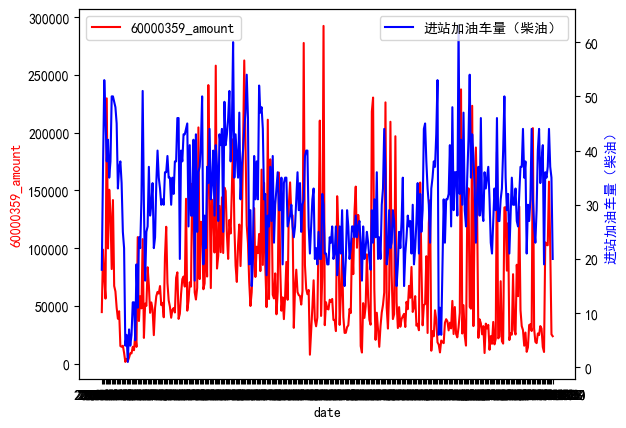

In [35]:
### 折线图 ###
import matplotlib.pyplot as plt

# 定义数据列
COLS_X ='date'
# COLS_Y1 = 'diff359'
COLS_Y1 = COLS_A
COLS_Y2 = COLS_B

# 设置字体，确保能正确显示汉字
plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置中文字体

# 创建一个图表和轴对象
fig, ax1 = plt.subplots()

# 绘制第一条曲线
ax1.plot(df[COLS_X], df[COLS_Y1], 'r-', label=COLS_Y1)
ax1.set_xlabel(COLS_X)
ax1.set_ylabel(COLS_Y1, color='r')

# 利用twinx()创建第二个Y轴
ax2 = ax1.twinx()

# 绘制第二条曲线
ax2.plot(df[COLS_X], df[COLS_Y2], 'b-', label=COLS_Y2)
ax2.set_ylabel(COLS_Y2, color='b')

# 显示图例
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# 显示图表
plt.show()

In [36]:
### 计算相关性 ###

import numpy as np
import matplotlib.pyplot as plt

# 定义比较的列
COLS_X = COLS_A
COLS_Y = COLS_B

# 计算交叉相关
x = df[COLS_X] 
y = df[COLS_Y]
# cross_corr = np.correlate(x, y, mode='full')

# 标准化两个序列
x_mean = x.mean()
x_std = x.std()
y_mean = y.mean()
y_std = y.std()
x_norm = (x - x_mean) / x_std
y_norm = (y - y_mean) / y_std

# 计算归一化的互相关
cross_corr = np.correlate(x_norm, y_norm, mode='full')
max_corr = np.max(np.abs(cross_corr))
cross_corr_normalized = cross_corr / max_corr

# 5.设置滞后
max_lag = 100 #只考虑前后5天
lags = np.arange(-max_lag, max_lag + 1)

start_index = len(x) - 1 - max_lag
end_index = len(x) - 1 + max_lag
cross_corr_normalized = cross_corr_normalized[start_index:end_index + 1]


# 绘制交叉相关图
plt.figure(figsize=(10, 6))
plt.plot(lags, cross_corr_normalized)
plt.title("Cross-Correlation between <"+COLS_X+"> and <"+COLS_Y+">")
plt.xlabel("Lag")
plt.ylabel("Cross-Correlation")
plt.show()

KeyError: '60000305_price'